In [1]:
# importing libraries
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# KD-tree
from scipy.spatial import KDTree

### TO-DO:

* Реализация простого KNN
* Реализация KD-tree

### Generating data

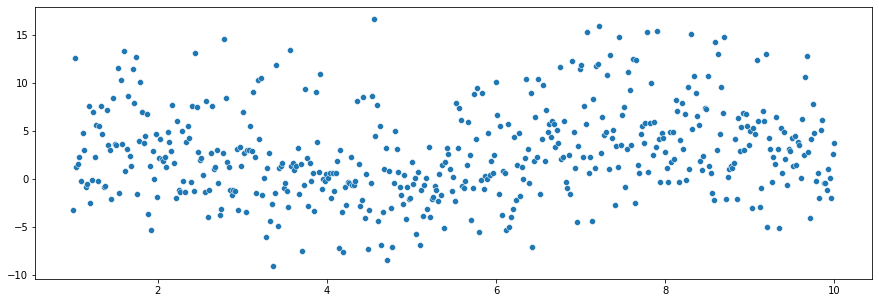

In [47]:
n = 500
X = np.linspace(1, 10, n).reshape(-1, 1)
real = 2 * np.sin(X.flatten()) + 0.3 * X.flatten()
y = 2 * np.sin(X.flatten()) + 0.3 * X.flatten() + 2.5 * np.random.randn(X.flatten().shape[0])

# making some anomalies
a_ratio = 0.2
y[np.random.randint(0, X.shape[0], int(n * a_ratio))] += 7 + 3 * np.random.randn()
y[np.random.randint(0, X.shape[0], int(n * a_ratio))] -= 7 + 3 * np.random.randn()

plt.figure(figsize=(15, 5))
sns.scatterplot(x=X.flatten(), y=y)
plt.show()

### Model creating

In [62]:
class KNN_Regressor:
    def __init__(self, k, p=2):
        self.k = k
        self.p = p
        self.X = None
        self.y = None
        
    def fit(self, X, y):
        self.X = KDTree(X)
        self.y = y
        
    def predict(self, X):
        vectorizer = np.vectorize(lambda x: np.mean(self.y[self.X.query(x, k=self.k, p=self.p)[1]]))
        return vectorizer(X)

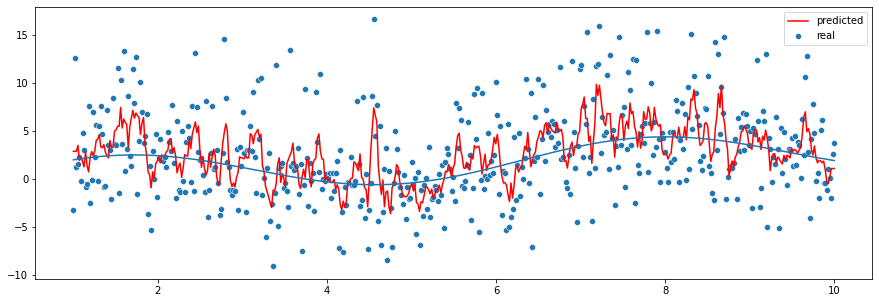

In [68]:
model = KNN_Regressor(5)
model.fit(X, y)

plt.figure(figsize=(15, 5))
sns.scatterplot(x=X.flatten(), y=y, label='real')
sns.lineplot(x=X.flatten(), y=model.predict(X).flatten(), label='predicted', color='r')
sns.lineplot(x=X.flatten(), y=real)
plt.show()